In [1]:
%display latex

In [2]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


In [3]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
g = M.lorentzian_metric('g')
m = var('m') ; assume(m>=0)
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2 
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [5]:
var('u')
outgeod = M.curve({X: [r + 2*m*ln(abs(r/(2*m)-1)) + u, r, pi/2, pi]}, (r, 0, +Infinity))
outgeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (2*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)

In [6]:
var('v')
ingeod = M.curve({X: [-r - 2*m*ln(abs(r/(2*m)-1)) + v, r, pi/2, pi]}, (r, 0, +Infinity))
ingeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (-2*m*log(abs(1/2*r/m - 1)) - r + v, r, 1/2*pi, pi)

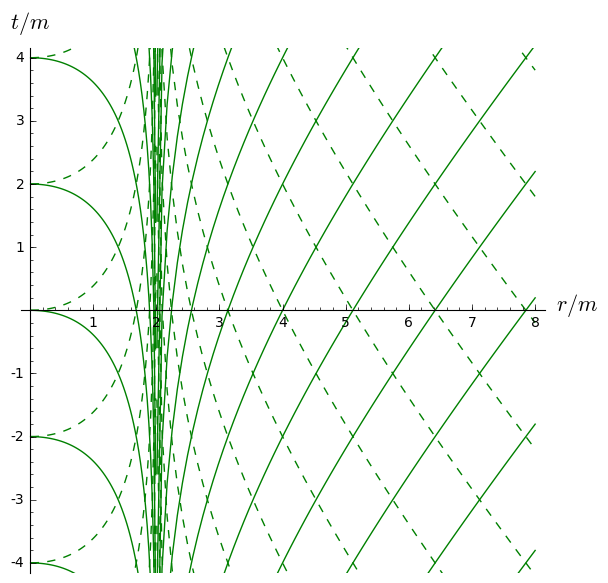

In [7]:
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += outgeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += outgeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, u: u0}, 
                          color='green', style='-', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(0.01, 1.99), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
    graph += ingeod.plot(ambient_coords=(r,t), prange=(2.01, 8), parameters={m: 1, v: u0}, 
                          color='green', style='--', thickness=1, label_axes=False)
show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)

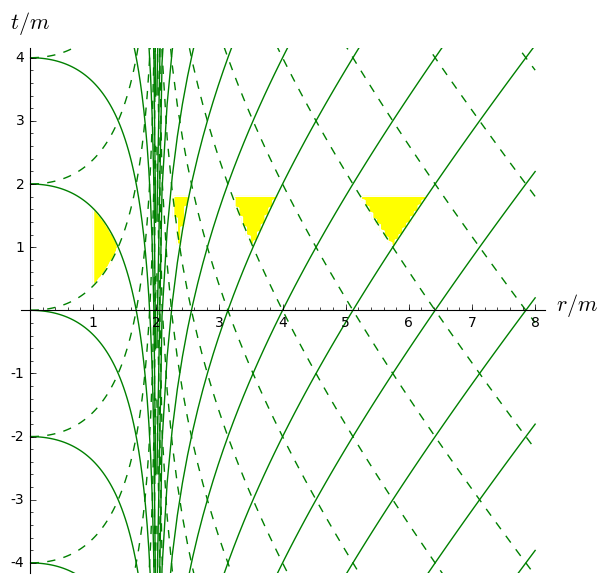

In [8]:
fout(r,u) = r + 2*ln(abs(r/2-1)) + u
fin(r,v) = -r - 2*ln(abs(r/2-1)) + v

def cone1(r,t):
    return t<fout(r,2) and t>fin(r,0) and r>1
def cone2(r,t):
    return t>fout(r,2) and t>fin(r,0) and t<1.8
def cone3(r,t):
    return t>fout(r,-2) and t>fin(r,4) and t<1.8
def cone4(r,t):
    return t>fout(r,-6) and t>fin(r,8) and t<1.8

graph += region_plot(cone1, (1,2), (0,2), incol='yellow')
graph += region_plot(cone2, (2,8), (0,2), incol='yellow')
graph += region_plot(cone3, (2,8), (0,2), incol='yellow')
graph += region_plot(cone4, (2,8), (0,2), incol='yellow')

show(graph, axes_labels=[r"$r/m$", r"$t/m$"], aspect_ratio=1, ymin=-4, ymax=4)

In [9]:
graph.save("sch_rad_null_geod.pdf", aspect_ratio=1, ymin=-4, ymax=4)

In [10]:
X_EF.<te,r,th,ph> = M.chart(r'te:\tilde{t} r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi') 
X_EF

Chart (M, (te, r, th, ph))

In [11]:
X_to_X_EF = X.transition_map(X_EF, [t+2*m*ln(abs(r/(2*m)-1)), r, th, ph])
X_to_X_EF.display()

te = 2*m*log(abs(1/2*r/m - 1)) + t
r = r
th = th
ph = ph

In [12]:
X_to_X_EF.inverse().display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(abs(-2*m + r)) + te
r = r
th = th
ph = ph

In [13]:
ingeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (-2*m*log(abs(1/2*r/m - 1)) - r + v, r, 1/2*pi, pi)
   r |--> (te, r, th, ph) = (-r + v, r, 1/2*pi, pi)

In [14]:
outgeod.display()

(0, +Infinity) --> M
   r |--> (t, r, th, ph) = (2*m*log(abs(1/2*r/m - 1)) + r + u, r, 1/2*pi, pi)
   r |--> (te, r, th, ph) = (-4*m*log(2) - 4*m*log(m) + 4*m*log(abs(-2*m + r)) + r + u, r, 1/2*pi, pi)

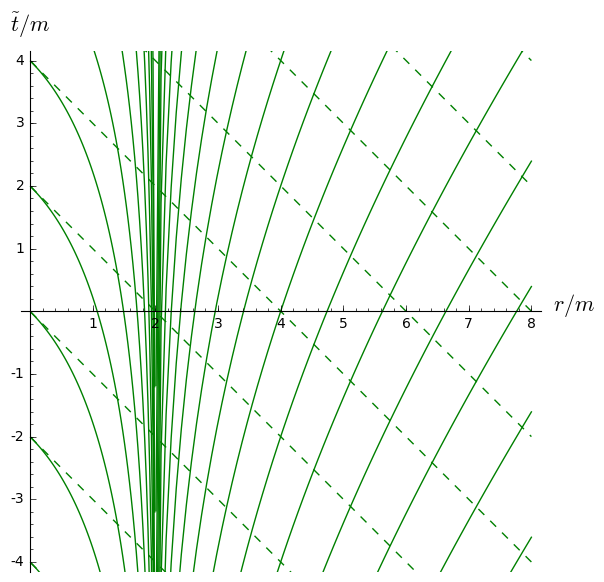

In [34]:
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += outgeod.plot(chart=X_EF, ambient_coords=(r,te), prange=(0.01, 1.99), 
                          parameters={m: 1, u: u0}, color='green', style='-', 
                          thickness=1, label_axes=False)
    graph += outgeod.plot(chart=X_EF, ambient_coords=(r,te), prange=(2.01, 8), 
                          parameters={m: 1, u: u0}, color='green', style='-', 
                          thickness=1, label_axes=False)
    graph += ingeod.plot(chart=X_EF, ambient_coords=(r,te), prange=(0.01, 8), 
                         parameters={m: 1, v: u0}, color='green', style='--', 
                         thickness=1, label_axes=False)
show(graph, axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], aspect_ratio=1, ymin=-4, ymax=4)

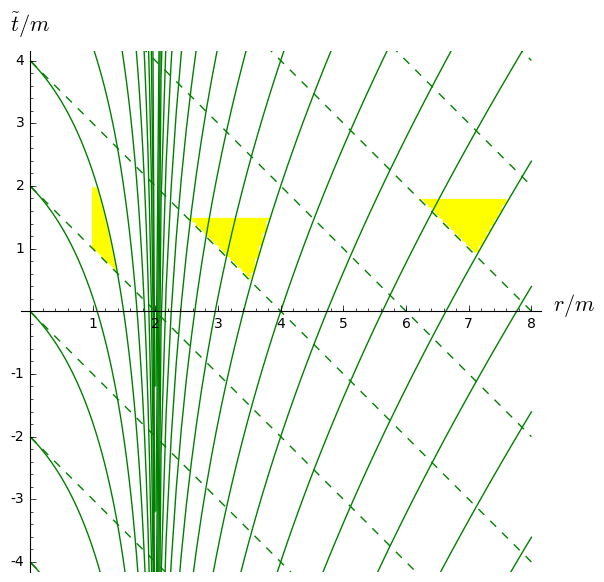

In [35]:
fout(r,u) = r + 4*ln(abs(r/2-1)) + u
fin(r,v) = -r + v

def cone1(r,t):
    return t<fout(r,4) and t>fin(r,2) and t<2
def cone2(r,t):
    return t>fout(r,2) and t>fin(r,0) and t<1.8
def cone3(r,t):
    return t>fout(r,-2) and t>fin(r,4) and t<1.5
def cone4(r,t):
    return t>fout(r,-10) and t>fin(r,8) and t<1.8

graph += region_plot(cone1, (1,2), (0,2), incol='yellow')
#graph += region_plot(cone2, (2,8), (0,2), incol='yellow')
graph += region_plot(cone3, (2,8), (0,2), incol='yellow')
graph += region_plot(cone4, (2,8), (0,2), incol='yellow')

show(graph, axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], aspect_ratio=1, ymin=-4, ymax=4)

In [36]:
graph.save("sch_rad_null_geod_EF.pdf", aspect_ratio=1, ymin=-4, ymax=4)